## Linear Regression on Air Pollution Dataset
- Exploratory Analysis

## Section - 1 Exploratory Analysis
- Load
- Analyse
- Visualise
- Normalize

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('D:/Machine Learning/projects/Linear Regression/Air Pollution/Train.csv')
X = data.values
print(X.shape)
print(type(X))
#print(X)
print(data.columns)


(1600, 6)
<class 'numpy.ndarray'>
Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')


In [40]:
#X = X[:,0:5]
y = X[:,-1]
X = X[:,0:5]
print(X.shape)
print(y.shape)
print(y)


(1600, 5)
(1600,)
[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [41]:
print(X.shape)
print(y.shape)

(1600, 5)
(1600,)


In [43]:
import pandas as pd
df = pd.DataFrame(X)
#df.columns = boston.feature_names
df.head()

,0,1,2,3,4
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [44]:
df.describe()

,0,1,2,3,4
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005
std,0.997338,1.021776,1.011768,1.017189,0.978654
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527
75%,0.682118,0.645442,0.639130,0.646290,0.650089
max,3.287205,3.438895,3.216176,2.985410,3.321770


In [45]:
# Normalise this dataset
# Each feature must have 0 mean, unit variance
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
#print(u.shape,std.shape)

In [46]:
# Normalise the Data
X = (X-u)/std


In [47]:
# Normalised Data
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4
0,0.290165,-0.898712,-0.372381,0.441771,0.525024
1,-0.842705,-0.158229,-0.723656,-0.994642,0.598960
2,0.233004,0.157070,-0.102094,0.729947,-0.203782
3,0.171708,0.167210,-0.530576,-0.078377,-1.333037
4,-1.702188,0.558336,-2.723087,-0.633625,1.259339


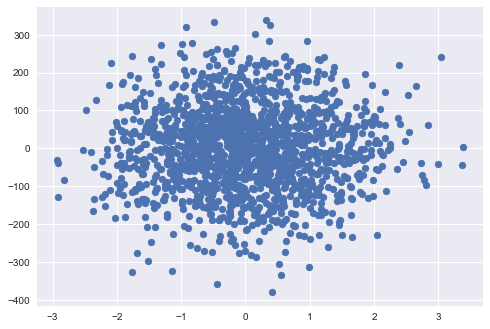

In [53]:
# Plot Y vs any feature
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.scatter(X[:,4],y)
plt.show()

## Section - 2 Linear Regression on Multiple Features
- Boston Housing Dataset

In [54]:
X.shape, y.shape

((1600, 5), (1600,))

In [55]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(1600, 6)


In [70]:
# X - Matrix ( m x n)
# x - Vector (Single Example with n features)

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list
#print(m)

In [71]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  37.47217416763306


## Quite Slow! 33 Seconds!  1600 examples in the training data!

In [72]:
print(theta)

[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


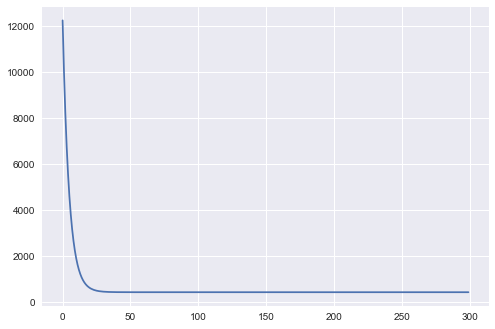

In [73]:
plt.plot(error_list)
plt.show()

## Predictions

In [99]:
y_ = []
m = X.shape[0]

for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)

    
y_ = np.array(y_)


TypeError: append() takes exactly one argument (2 given)

In [75]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [76]:
# SCORE
r2_score(y,y_)

96.60939669975616

### Section-3 Optimising Code using Vectorization
An Efficent Implemenation for Linear Regression using Vectorization
- Avoid loops in the implemenation, except gradient descent main loop
- Use numpy functions like ```np.sum()```, ```np.dot()``` which are quite fast and already optimised

In [77]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list
    


In [78]:
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.022022247314453125


## Really Very Fast! :D

In [79]:
theta

array([ 0.31883538, 29.59359198, 94.65067706,  8.37544469, 45.52303635,
        2.46461552])

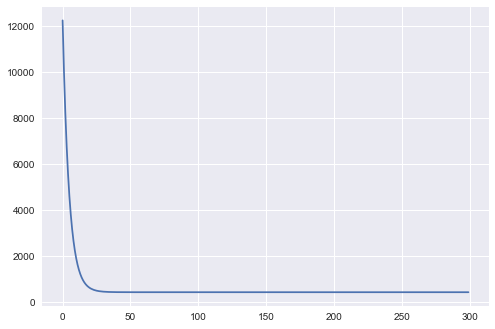

In [80]:
plt.plot(error_list)
plt.show()

In [81]:
## Predictions
y_ = hypothesis(X,theta)
r2_score(y,y_)

96.60939669975616

In [134]:
# Load the test data
X_test = pd.read_csv('D:/Machine Learning/projects/Linear Regression/Air Pollution/Test.csv').values
#X_test = X_test.values
print(X_test.shape)
print(type(X_test))
#y_test = hypothesis(X_test,theta)
#print(X.shape)

(400, 5)
<class 'numpy.ndarray'>


In [135]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))
print(X_test.shape)
print(X_test[:,1].shape)
#df = pd.DataFrame(data=y_test,columns=["id,target"])

(400, 6)
(400,)


In [139]:
y_ = hypothesis(X_test,theta)
df = pd.DataFrame(data=y_,columns=["Id,target"])

NameError: name 'Id' is not defined

In [138]:
df.to_csv('y_prediction2.csv',index=True)

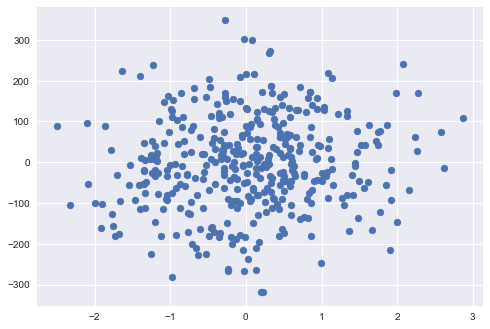

In [129]:
plt.scatter(X_test[:,5],y_)